## 13주 Sklearn make_classification으로 생성된 데이터에 대해 이진 베이지안 모델
문제: Sklearn make_classification으로 생성된 데이터에 대해 이진 베이지안 모델

Sklearn의 make_classification() 함수는 분류에 쓰일 수 있는 데이터를 생성해준다.

from sklearn.datasets import make_classification

X, Y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)

Sklearn으로 이진 베이지안 모델링을 해보자.

* (1) X, Y 데이터를 생성

* (2) X의 평균과 표준편차 계산해서 출력

* (3) 그래프 작성
    * scatter() 함수에 c=Y 옵션을 넣으면, Y의 값에 대해 다른 색으로 표시할 수 있다.

* (4) 훈련데이터, 테스트데이터 3:1로 분리
   * train_test_split()함수를 사용하면 원하는 비율로 분리할 수 있다.

* (5) 훈련데이터에 대하여 BernoulliNB 모델링
    * X데이터는 연속 값이다. binarize=0.0으로 설정하여 이진수로 모델링한다.

* (6) 테스트데이터에 대하여 예측값을 출력
    * 예측이 맞는지 실제값 Y와 비교해보자.

* (7) 테스트데이터에 대하여 예측과 실제의 정확성 출력

In [0]:
import os
import pyspark

### (1) X,Y 데이터 생성

In [0]:
# 데이터 생성하기
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)
# n_samples : 표본 데이터 수
# n_features : 독립 변수의 수 (전체 피처의 수)
# n_informative : 독립 변수 중 종속 변수와 상관관계가 있는 성분의 수 
# n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수 

### (2) X의 평균과 표준편차를 계산해서 출력

In [0]:
# X의 평균과 표준편차 출력하기
import numpy as np
print("X mean is : ",np.mean(X))
print("X std is : ",np.std(X))

X mean is : 0.13287833348599146
X std is : 1.3223416048184335

### (3) 그래프 작성
scatter() 함수에 c=Y 옵션을 넣으면, Y의 값에 대해 다른 색으로 표시할 수 있다.

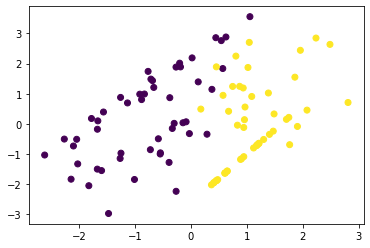

In [0]:
#%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],marker='o', c=Y)
plt.show()

### (4) 훈련데이터, 테스트데이터 3:1로 분리
train_test_split()함수를 사용하면 원하는 비율로 분리할 수 있다.

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, stratify=Y)

### (5) 훈련데이터에 대하여 BernoulliNB 모델링
X데이터는 연속 값이다. binarize=0.0으로 설정하여 이진수로 모델링한다.

In [0]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
clf.fit(x_train, y_train) 

Out[40]: BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

### (6) 테스트데이터에 대하여 예측값을 출력
예측이 맞는지 실제값 Y와 비교해보자.

In [0]:
print(clf.predict(x_test))
print(y_test)

[1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1]
[0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1]

### (7) 테스트데이터에 대하여 예측과 실제의 정확성 출력

In [0]:
#test 데이터에 대해서
clf.score(x_test,y_test)

Out[59]: 0.88

In [0]:
clf.score(x_train,y_train)

Out[60]: 0.92